# Clustering
Clustering, or unsupervised learning is a classification method with no class labels. Clustering aims to estimate the labels of the training data. 


## Hierarchical clustering and dendrogram
Hierarchical clustering makes groups in a specific order. The next step of the algorithm is the merge (or split) of the pervious step. The merge (or split) is implemented using a specific metric, often based on the Euclidean distance. Let's start with the data already generated in chapter 3. 

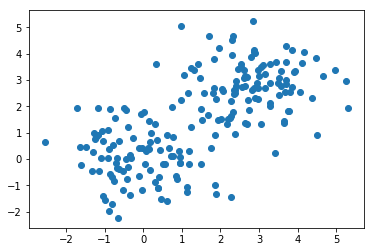

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
np.random.seed(0)
n = 100
X = np.vstack((np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], n), 
             np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]] , n)))
plt.scatter(X[:,0], X[:,1]);

##Fitting hierarchical clustering 
Now we implement agglomerative clustering using the average linkage.

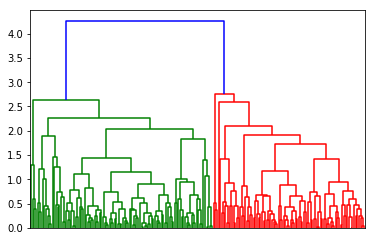

In [2]:
import scipy.cluster.hierarchy as AHC
X_dist = AHC.distance.pdist(X) #make the pairwise distance
X_linkage = AHC.linkage(X_dist, method = "average")
den = AHC.dendrogram(X_linkage, no_labels = True)

# Fitting K-Means
The k-means algorithm is one of the most efficient clustering techniques. It starts with some initial value, often $k$ random samples of the observations. Then, iteratively clusters the closest observations to the mean, and then updates the cluster mean accordingly. The number of clusters $k$ is the hyperparameter of the algorithm to be set by the user.

In [3]:
from sklearn import cluster
X_kmeans = cluster.KMeans(n_clusters = 2)
X_kmeans.fit(X)
X_labels = X_kmeans.labels_
X_centers = X_kmeans.cluster_centers_

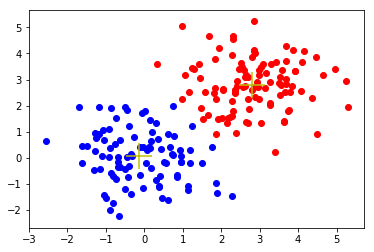

In [4]:
index=X_labels == 0 
plt.scatter(X[index, 0], X[index,1], color = "r")
plt.scatter(X[~index,0], X[~index,1], color = "b")
plt.scatter(X_centers[:,0], X_centers[:,1], color = "y", 
            facecolor="y", marker="+", s = 700)


# Zip data


In [5]:
path='data/'
filename = path+'ziptrain.csv'
import numpy as np
zipdata = np.loadtxt("data/ziptrain.csv")
zipdata.shape

zipdata3=zipdata[zipdata[:, 0] == 3]
zipdata8=zipdata[zipdata[:, 0] == 8]

zipdata38 = np.vstack([zipdata3, zipdata8])





In [6]:
zip_kmeans = cluster.KMeans(n_clusters = 2)
zip_kmeans.fit(zipdata38)
zip_labels = zip_kmeans.labels_
zip_centers = zip_kmeans.cluster_centers_


In [7]:
zip_labels.shape

(1200,)

# unsupervised labels



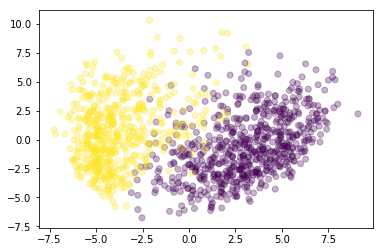

In [8]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
pca.fit(zipdata38[:, 1:])
Z = pca.transform(zipdata38[:,1:])
plt.scatter(Z[:,0], Z[:,1], c=zip_labels , alpha=0.3);


# True labels

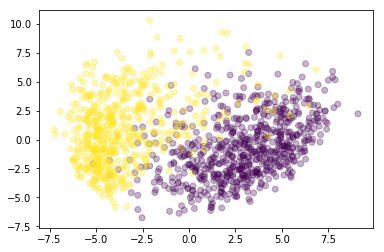

In [9]:

plt.scatter(Z[:,0], Z[:,1], c= zipdata38[:,0], alpha=0.3);



## Image processing application
Now we try hierarchical clustering on the grayscale cat.

(-0.5, 492.5, 334.5, -0.5)

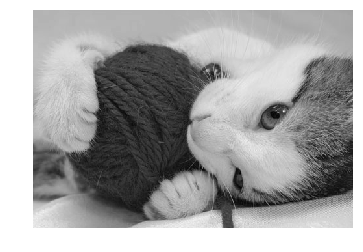

In [13]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
#url=url="http://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/articles/health_tools/is_my_cat_normal_slideshow/photolibrary_rf_photo_of_cat_eating_red_yarn.jpg"
img = plt.imread("data/cutecat.jpg")
img_tinted = img * [.27, .72, 0.07]
cat = np.sum(img_tinted, axis=2)
plt.imshow(cat, "gray")
plt.axis("off")

In [14]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering as AHC
X = np.reshape(cat, (-1, 1))

img_graph = grid_to_graph(*cat.shape)
k = 5
ward = AHC(n_clusters=k,linkage="ward", connectivity=img_graph).fit(X)
cat_segment = np.reshape(ward.labels_,cat.shape)

(-0.5, 492.5, 334.5, -0.5)

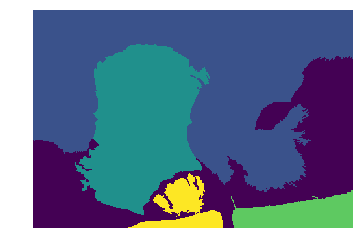

In [15]:
plt.imshow(cat_segment);
plt.axis("off")